<a href="https://colab.research.google.com/github/yashsingla1/machine-learning1/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
RMSE value is 1.2131594907485281


Text(0, 0.5, 'cost (J)')

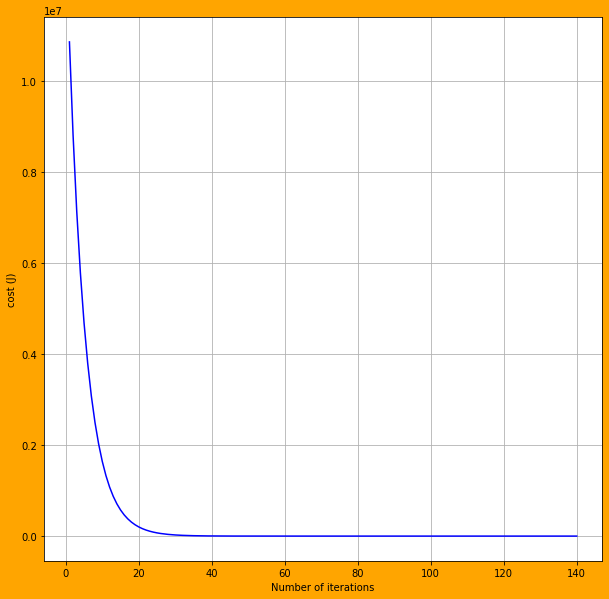

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

import pandas as pd 
df=pd.read_csv('gdrive/My Drive/Linear_train.csv')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd




X = df.values[:, 1:21]
#print(X)
y = df.values[:, 21]
m = len(y)

#print('Total no of training examples (m) = %s \n' %(m))

def feature_normalize(X):
  mu = np.mean(X, axis = 0)
  sigma = np.std(X, axis= 0, ddof = 1)
  X_norm = (X - mu)/sigma
  return X_norm,mu,sigma
X,mu,sigma=feature_normalize(X)  

X = np.hstack((np.ones((m,1)), X))


def compute_cost(X, y, theta):
  predictions = X.dot(theta)
  errors = np.subtract(predictions, y)
  sqrErrors = np.square(errors)
  J = 1/(2 * m) * errors.dot(errors)
  return J

def gradient_descent(X, y, theta, alpha, iterations):
  cost_history = np.zeros(iterations)
  for i in range(iterations):
    predictions = X.dot(theta)
    
    errors = np.subtract(predictions, y)
    sum_delta = (alpha / m) * X.transpose().dot(errors);
    theta = theta - sum_delta;
    cost_history[i] = compute_cost(X, y, theta) 
  return theta, cost_history
                          
theta = np.zeros(21)
iterations = 140;
alpha = 0.1;

theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)

#print('Final value of theta =', theta)
#print('First 5 values of cost from cost_history =', cost_history[:5])
#print('Last 5 values of cost from cost_history =', cost_history[-5 :])





df2=pd.read_csv('gdrive/My Drive/Linear_test.csv')
X1 = df2.values[:, 1:21]
Y1=df2.values[:, 21]
m1=len(Y1)
X_norm1 = (X1 - mu)/sigma
X_norm1= np.hstack((np.ones((m1,1)), X_norm1))
price =X_norm1.dot(theta)
#print(price)
errors = np.subtract(price,Y1)
sqrErrors = np.square(errors)
sqrErrors=sqrErrors**0.5
sum=0
for i in range(m1):
  sum=sum+sqrErrors[i]
mean=sum/m1
root=mean**0.5
print("RMSE value is", root)
#print("PLOT OF GRAPH OF COSST FUNCTION WITH INCREASING ITERATIONS ")

import matplotlib.pyplot as plt
plt.plot(range(1, iterations +1), cost_history, color ='blue')
plt.rcParams["figure.figsize"] = (10,10)
plt.grid()
'''ax = plt.axes()
ax.set_facecolor("yellow")
#plt.rcParams['figure.facecolor'] ="orange"'''
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
#plt.title("Convergence of gradient descent")
#print(X)










